# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from lisc import Words
from lisc.data import ArticlesAll
from lisc.data.utils import threshold_counter, combine_lists
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values, get_attribute_counts

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_attrs_by_year

## Setup

In [4]:
# Settings
SAVE_FIG = False

In [5]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/words'
db = SCDB('../data/')

In [6]:
# Set the name of the file to load
name = 'erps' # 'erps', 'test'

In [7]:
# Load the words object
words = load_object('words_' + name, directory=db, reload_results=True)

In [8]:
# Load exclusions for analysis
exclusions = load_txt_file('analysis_exclusions.txt', term_dir, split_elements=False)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [9]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210612-2212m.2',
 'count': '32672486',
 'lastupdate': '2021/06/13 07:12'}

In [10]:
# Check requester object info
words.meta_data.requester

{'n_requests': 474,
 'wait_time': 0.1,
 'start_time': '22:16:35 Monday 14 June 2021',
 'end_time': '22:48:57 Monday 14 June 2021',
 'logging': None}

## Data Organization

In [11]:
# Process data to collapse across all articles
words.process_combined_results(exclusions=exclusions)

### Check Number of Articles

In [12]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 98


In [13]:
# Check the total number of articles in the collected dataset
n_articles = [data.n_articles for data in words]
total_article_count = sum(n_articles)
print('Number of articles: \t', total_article_count)

Number of articles: 	 31556


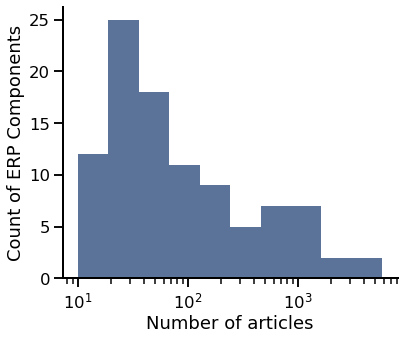

In [14]:
# Plot the histogram of the number of ERP papers collected
plot_count_hist(n_articles, log=True, bins=10,
                xlabel='Number of articles', ylabel='Count of ERP Components',
                save_fig=SAVE_FIG, file_name='erp_hist.pdf', directory=figs_dir)

In [15]:
# Collect all the DOIs across all papers
dois = get_all_values(words, 'dois', unique=True)

In [16]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 21579


In [17]:
# Check how many articles were found per ERP
for data in words.results:
    print(data.label, '\t', data.n_articles)

P100 	 1734
P110 	 26
P120 	 61
P150 	 157
P160 	 29
P170 	 32
P180 	 75
P190 	 26
P200 	 834
P220 	 37
P230 	 18
P240 	 27
P250 	 86
P260 	 37
P270 	 14
P300 	 5839
P3a 	 979
P3b 	 1061
P340 	 10
P350 	 68
P400 	 167
P500 	 51
P550 	 15
P600 	 716
P900 	 21
N100 	 1006
N110 	 21
N120 	 51
N130 	 34
N135 	 45
N140 	 177
N150 	 117
N160 	 55
N170 	 1381
N180 	 39
N190 	 24
N200 	 780
N2a 	 95
N2b 	 236
N2c 	 25
N2pc 	 507
N220 	 10
N230 	 11
N240 	 20
N250 	 269
N270 	 67
N280 	 21
N290 	 51
N300 	 194
N320 	 23
N350 	 82
N400 	 2594
N450 	 174
N550 	 49
N600 	 13
N700 	 18
MMN 	 3685
CDA 	 158
LPC 	 649
LPP 	 953
NSW 	 102
PSW 	 112
VPP 	 58
CNV 	 1011
PINV 	 33
ELAN 	 33
LAN 	 57
CPS 	 37
LRP 	 305
LDN 	 37
ORN 	 37
BP 	 527
ERN 	 1034
Pe 	 307
CRN 	 96
MFN 	 97
SPeN 	 128
FRN 	 594
Pd 	 24
EDAN 	 22
LDAP 	 15
ADAN 	 29
EPN 	 244
SN 	 76
SP 	 33
SPN 	 19
SPCN 	 41
PCN 	 62
MRPC 	 303
FSP 	 20
pN 	 23
LPN 	 29
LPoP 	 24
EFN 	 10
FN400 	 170
PMN 	 11
VAN 	 31
RN 	 11


## Check Attribute Counts

In [18]:
# Define a list of attributes to check
attrs = ['words', 'keywords', 'authors', 'journals', 'dois', 'titles', 'years']

In [19]:
# Check the proportion of papers, for each attribute, that has data
print('Attribute counts (total # articles: {}):'.format(total_article_count))
for attr in attrs:
    count = get_attribute_counts(words, attr)
    print('    {:5d} articles ({:6.2f} %) have {}.'.format(\
        count, count / total_article_count * 100, attr))

Attribute counts (total # articles: 31556):
    31056 articles ( 98.42 %) have words.
    10844 articles ( 34.36 %) have keywords.
    31538 articles ( 99.94 %) have authors.
    31556 articles (100.00 %) have journals.
    29392 articles ( 93.14 %) have dois.
    31556 articles (100.00 %) have titles.
    31556 articles (100.00 %) have years.


### Check Years of Publication

In [20]:
# Get global count of authors 
years = set(get_all_values(words, 'years'))
min_year, max_year = min(years), max(years)

In [21]:
# Print out summary of the year range of publications
print('Collected papers were published between the years: {}-{}'.format(min_year, max_year))

Collected papers were published between the years: 1964-2021


In [22]:
# Get the count of articles per year, and drop 2021 (incomplete year)
year_counts = get_all_counts(words, 'years', combine=True)
year_counts.pop(2021);

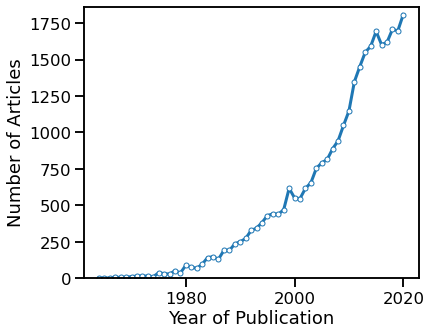

In [23]:
# Plot the total number of articles, across components, per year
plot_years(year_counts, figsize=(6, 5),
           save_fig=SAVE_FIG, file_name='words_year_counts.pdf', directory=figs_dir)

### Check number of distinct components studies per year

In [24]:
# Collect the set of years each component was studied in
comp_years_all = {}
for label, res in zip(words.labels, words.results):
    comp_years_all[label] = set(res.years)

In [25]:
# Collect the number of unique components studied per year
comp_years = {}
for year in range(min(years), max(years)):
    count = 0
    for temp in comp_years_all.values():
        count += 1 if year in temp else 0
    comp_years[year] = count

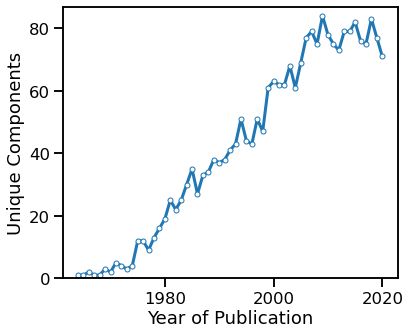

In [26]:
# Plot the number of unique components studied per year
plot_years(comp_years, ylabel='Unique Components', figsize=(6, 5),
           save_fig=SAVE_FIG, file_name='words_year_components.pdf', directory=figs_dir)

### Check Authors across all papers

In [27]:
# Get global count of authors 
author_counts = get_all_counts(words, 'authors', combine=True)

In [28]:
# Check the number of unique authors
print('Total number of authors   :\t {:5d}'.format(len(author_counts)))
print('Number of authors > 10   :\t {:5d}'.format(len(threshold_counter(author_counts, 10))))
print('Number of authors > 100  :\t {:5d}'.format(len(threshold_counter(author_counts, 100))))

Total number of authors   :	 43366
Number of authors > 10   :	  2498
Number of authors > 100  :	    32


In [29]:
# Check the most common authors
print('Most common authors:')
for (author, count) in author_counts.most_common(10):
    print('    {:15s} \t {}'.format(' '.join(author), count))

Most common authors:
    Näätänen R      	 330
    Wang Y          	 265
    Hajcak G        	 209
    Schröger E      	 199
    Holcomb PJ      	 191
    Zhang Y         	 187
    Li H            	 184
    Polich J        	 182
    Friederici AD   	 169
    Wang L          	 164


### Check Journals across all papers

In [30]:
# Get global count of journals
journals_counts = get_all_counts(words, 'journals', combine=True)

In [31]:
# Check the number of unique authors
print('Total number of journals  :\t {:5d}'.format(len(journals_counts)))
print('Number of journals > 10   :\t {:5d}'.format(len(threshold_counter(journals_counts, 10))))
print('Number of journals > 100  :\t {:5d}'.format(len(threshold_counter(journals_counts, 100))))

Total number of journals  :	  2106
Number of journals > 10   :	   330
Number of journals > 100  :	    50


In [32]:
# Check the most common journals
print('Most common journals:')
for (journal, count) in journals_counts.most_common(10):
    print('    {:55s} \t {}'.format(journal.split(':')[0], count))

Most common journals:
    Psychophysiology                                        	 1596
    International journal of psychophysiology               	 1206
    Neuropsychologia                                        	 1036
    Biological psychology                                   	 1014
    Clinical neurophysiology                                	 945
    Brain research                                          	 835
    Neuroreport                                             	 748
    Journal of cognitive neuroscience                       	 736
    PloS one                                                	 716
    Frontiers in human neuroscience                         	 685


### Keywords

In [33]:
# Get global count of authors 
kw_counts = get_all_counts(words, 'keywords', combine=True)

In [34]:
# Check the number of unique keywords
print('Total number of keywords   :\t {:5d}'.format(len(kw_counts)))
print('Number of keywords > 10    :\t {:5d}'.format(len(threshold_counter(kw_counts, 10))))
print('Number of keywords > 100   :\t {:5d}'.format(len(threshold_counter(kw_counts, 100))))

Total number of keywords   :	 14203
Number of keywords > 10    :	   754
Number of keywords > 100   :	    37


In [35]:
# Check the most common keywords across all components
print('Most common keywords:')
for (kw, count) in kw_counts.most_common(10):
    print('    {:20s} \t {}'.format(kw, count))

Most common keywords:
    attention            	 702
    emotion              	 483
    p300                 	 473
    schizophrenia        	 409
    n400                 	 304
    error-related negativity 	 299
    cognitive control    	 230
    working memory       	 228
    p3                   	 227
    aging                	 210


In [36]:
# Check most common keywords per component
for data in words.combined_results:
    data.check_frequencies('keywords', n_check=5)

P100  : visual evoked potentials, visual evoked potential, n170, emotion, multiple sclerosis
P110  : 
P120  : phosphorus application, photosynthetic characteristics, population structure, uniform seeding pattern, winter wheat
P150  : aging, congenital hypothyroidism, iodine diet, psychiatric diseases, thyroid hormones
P160  : c1, higher-order cortical processing, perceptual learning, primary visual cortex
P170  : attention, hearing loss, neural mechanism, visual compensatory, dft
P180  : transcranial magnetic stimulation, tms-eeg, tms-evoked potentials, dorsolateral prefrontal cortex, schizophrenia
P190  : n/p190, n400, masked conceptual priming, masked repetition priming, visual object processing
P200  : n400, p300, n170, n100, attention
P220  : complexity, fraser spiral illusion, illusion, shape perception
P230  : confabulation, desynchronization, face recognition, memory schema, theta coherence
P240  : somatosensory cortex, touch, chinese three-character verb–object metaphor, contex

### Abstract Words

In [37]:
# Get global count of words 
word_counts = get_all_counts(words, 'words', combine=True)

In [38]:
# Check the number of unique words
print('Total number of words   :\t {:5d}'.format(len(word_counts)))
print('Number of words > 100   :\t {:5d}'.format(len(threshold_counter(word_counts, 100))))
print('Number of words > 1000  :\t {:5d}'.format(len(threshold_counter(word_counts, 1000))))

Total number of words   :	 88798
Number of words > 100   :	  4214
Number of words > 1000  :	   726


In [39]:
# Check the most common keywords across all components
print('Most common words:')
for (word, count) in word_counts.most_common(10):
    print('    {:20s} \t {}'.format(word, count))

Most common words:
    processing           	 26548
    patients             	 23560
    amplitude            	 20115
    study                	 19712
    task                 	 19309
    stimuli              	 19080
    results              	 18884
    visual               	 16143
    response             	 15525
    auditory             	 15182


In [40]:
# Check most common words
for data in words.combined_results:
    data.check_frequencies('words', n_check=5)

P100  : visual, patients, vep, latency, amplitude
P110  : visual, response, processing, children, components
P120  : stimuli, visual, p, components, ms
P150  : processing, visual, patients, early, components
P160  : interaction, binding, results, receptor, p
P170  : control, components, visual, cortex, ms
P180  : cortex, cortical, patients, subjects, ms
P190  : priming, recorded, cortex, area, repetition
P200  : patients, processing, p300, amplitude, n100
P220  : amplitude, de, components, sleep, stimulus
P230  : ms, components, differences, stimuli, visual
P240  : amplitude, stimuli, stimulus, components, processing
P250  : processing, components, patients, amplitude, task
P260  : pain, stimuli, components, processing, patients
P270  : stimuli, stimulus, stimulation, amplitude, components
P300  : patients, amplitude, study, latency, cognitive
P3a   : auditory, stimuli, p3b, patients, processing
P3b   : task, processing, stimuli, p3a, amplitude
P340  : pain, seps, patients, training, p

## Check Values by Year

In [41]:
# Extract lists of all values for attributes of interest
all_years = get_all_values(words, 'years')
all_journals = get_all_values(words, 'journals')
all_authors = get_all_values(words, 'authors')

In [42]:
# Collect the number of unique journals & authors by year
journals_by_year = {}
authors_by_year = {}
for year in range(min_year, max_year):
    inds = np.where(np.array(all_years) == year)[0]
    journals_by_year[year] = len(set(np.array(all_journals)[inds]))
    authors_by_year[year] = len(set(combine_lists([all_authors[ind] for ind in inds])))

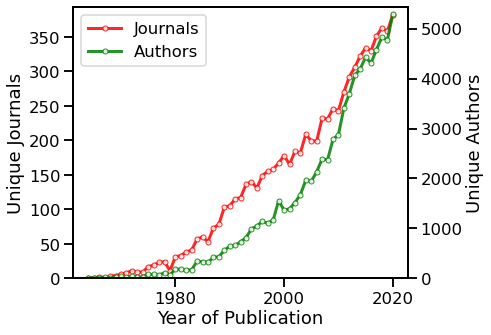

In [43]:
# Plot unique journals & authors by year
plot_attrs_by_year(journals_by_year, authors_by_year, figsize=(6, 5),
                   save_fig=SAVE_FIG, file_name='words_attr_year.pdf', directory=figs_dir)

## Example Component Summaries

In [44]:
# Set indices for some example components
inds = [15, 51]
print(words.labels[inds[0]], words.labels[inds[1]])

P300 N400


In [45]:
# Check some example summaries
for ind in inds:
    words.combined_results[ind].create_summary()
    words.combined_results[ind].print_summary()

P300 :
  Number of articles: 		 5839
  First publication: 		 1971
  Most common author: 		 Polich J
    number of publications: 	 116
  Most common journal: 		 Psychophysiology
    number of publications: 	 248 

N400 :
  Number of articles: 		 2594
  First publication: 		 1980
  Most common author: 		 Holcomb PJ
    number of publications: 	 91
  Most common journal: 		 Neuropsychologia
    number of publications: 	 217 



### WordCloud Plots

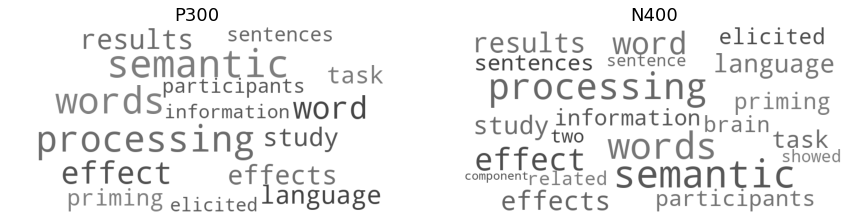

In [46]:
# Create wordclouds
_, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_wordcloud(words.combined_results[ind].words, inds[0], ax=axes[0])
axes[0].set_title(words.labels[inds[0]]);
plot_wordcloud(words.combined_results[ind].words, inds[1], ax=axes[1])
axes[1].set_title(words.labels[inds[1]]);

### History Plots

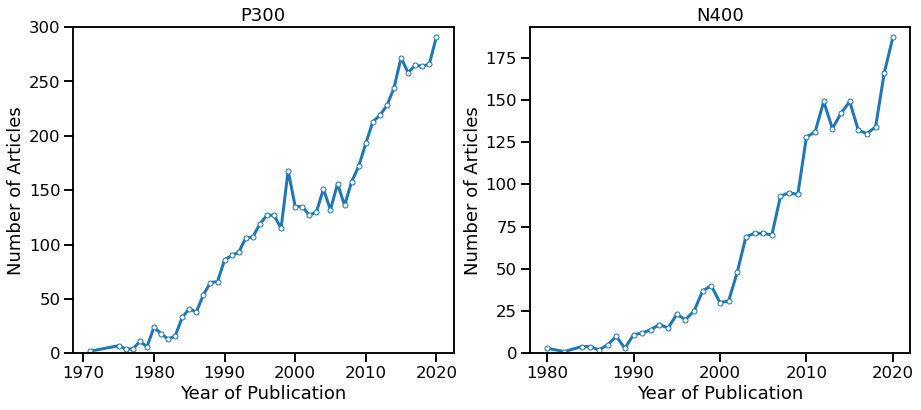

In [47]:
# Check an example history plot
_, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_years(words.combined_results[inds[0]].years, [None, 2020], ax=axes[0])
axes[0].set_title(words.labels[inds[0]]);
plot_years(words.combined_results[inds[1]].years, [None, 2020], ax=axes[1])
axes[1].set_title(words.labels[inds[1]]);